In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
reviews = pd.read_csv("IMDB Dataset.csv")

In [4]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
reviews.isnull().sum()

review       0
sentiment    0
dtype: int64

In [6]:
reviews['sentiment'] = reviews['sentiment'].map({'positive': 1, 'negative': 0})
p_ct = (reviews['sentiment'] == 1).sum()
n_ct = (reviews['sentiment'] == 0).sum()
print(p_ct,n_ct)

25000 25000


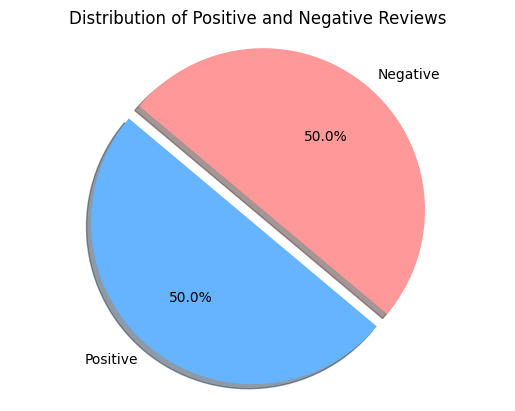

In [7]:
labels = ['Positive', 'Negative']
sizes = [p_ct, n_ct]
colors = ['#66b3ff', '#ff9999']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Distribution of Positive and Negative Reviews")
plt.show()

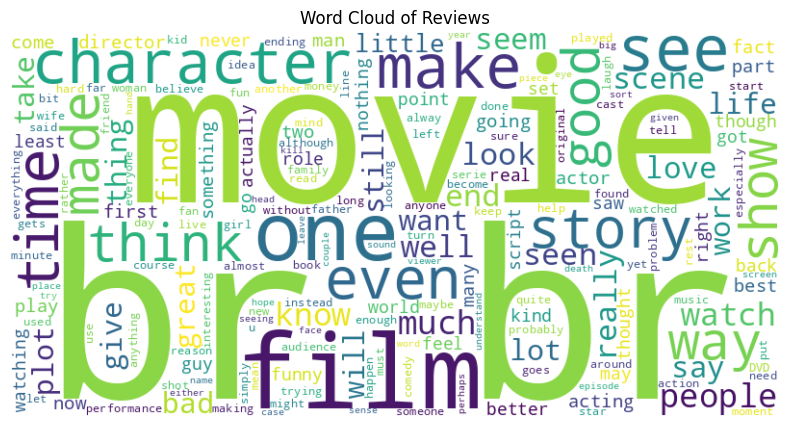

In [8]:
from wordcloud import WordCloud
text = " ".join(review for review in reviews['review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Reviews")
plt.show()

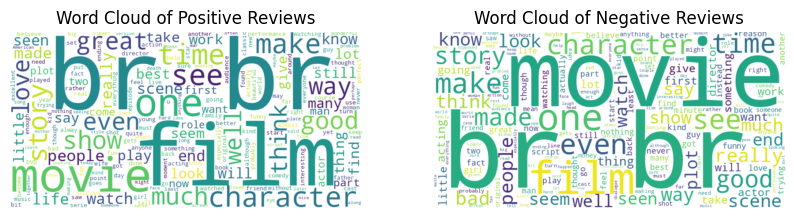

In [9]:
positive_reviews = reviews[reviews['sentiment'] == 1]
positive_text = " ".join(review for review in positive_reviews['review'])
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

negative_reviews = reviews[reviews['sentiment'] == 0]
negative_text = " ".join(review for review in negative_reviews['review'])
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Positive Reviews")

plt.subplot(122)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Negative Reviews")
plt.show()

In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
from nltk.corpus import stopwords

In [12]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [14]:
def transform_review(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)

In [15]:
reviews["transformed_review"]=reviews['review'].apply(transform_review)
reviews.head()

,review,sentiment,transformed_review
0,One of the other reviewers has mentioned that ...,1,one review mention watch 1 oz episod hook righ...
1,A wonderful little production. <br /><br />The...,1,wonder littl product br br film techniqu fashi...
2,I thought this was a wonderful way to spend ti...,1,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,0,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love time money visual stun film...


In [20]:
reviews['transformed_review'] = reviews['transformed_review'].str.replace('br', '')

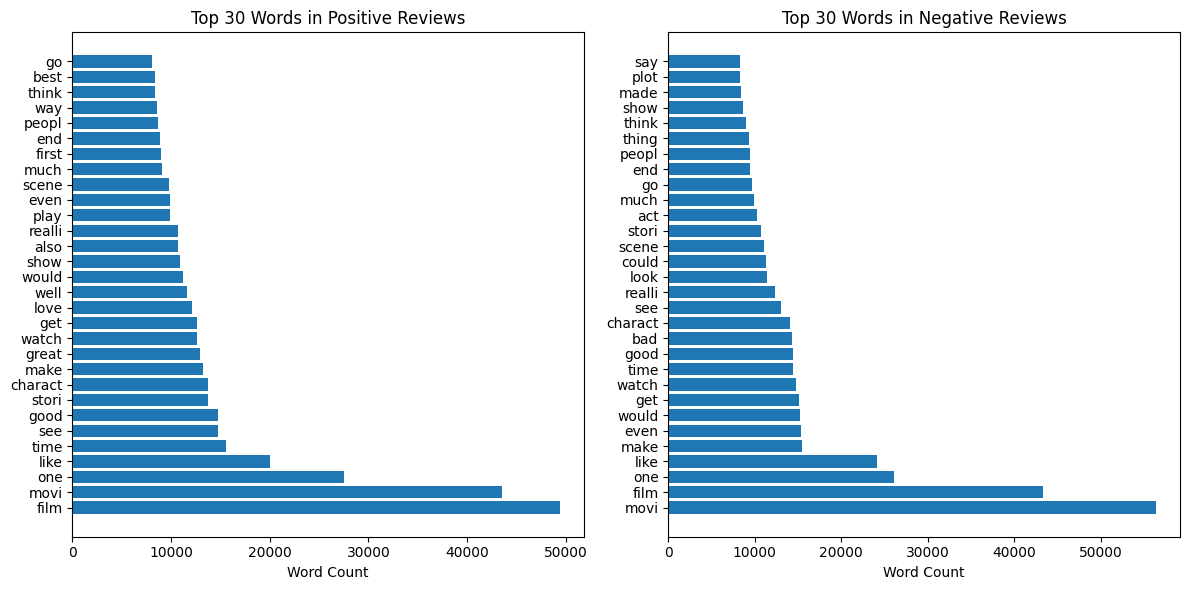

In [21]:
from collections import Counter
positive_reviews = " ".join(reviews[reviews['sentiment'] == 1]['transformed_review'])
negative_reviews = " ".join(reviews[reviews['sentiment'] == 0]['transformed_review'])

# Tokenize the text
positive_words = positive_reviews.split()
negative_words = negative_reviews.split()

# Count word frequencies
positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)

# Get the most common words (e.g., top 10)
top_positive_words = positive_word_counts.most_common(30)
top_negative_words = negative_word_counts.most_common(30)

# Extract the words and their counts
positive_words, positive_counts = zip(*top_positive_words)
negative_words, negative_counts = zip(*top_negative_words)

# Create bar charts for the most common words
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.barh(positive_words, positive_counts)
plt.title("Top 30 Words in Positive Reviews")
plt.xlabel("Word Count")

plt.subplot(122)
plt.barh(negative_words, negative_counts)
plt.title("Top 30 Words in Negative Reviews")
plt.xlabel("Word Count")

plt.tight_layout()
plt.show()

In [22]:
reviews.to_csv('transformed_reviews.csv', index=False)

In [26]:
!mv transformed_reviews.csv /content/drive/MyDrive/

mv: cannot move 'transformed_reviews.csv' to '/content/drive/MyDrive/': No such file or directory


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data= pd.read_csv("transformed_reviews.csv")

In [3]:
data.head()

,review,sentiment,transformed_review
0,One of the other reviewers has mentioned that ...,1,one review mention watch 1 oz episod hook righ...
1,A wonderful little production. <br /><br />The...,1,wonder littl product film techniqu fashion g...
2,I thought this was a wonderful way to spend ti...,1,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,0,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love time money visual stun film...


In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
n=5000
cv=CountVectorizer(max_features=n)
tfidf=TfidfVectorizer(max_features=n)

In [5]:
X1 = cv.fit_transform(data['transformed_review']).toarray()
X1.shape

(50000, 5000)

In [6]:
X2 = tfidf.fit_transform(data['transformed_review']).toarray()
X2.shape

(50000, 5000)

In [7]:
Y = data["sentiment"]

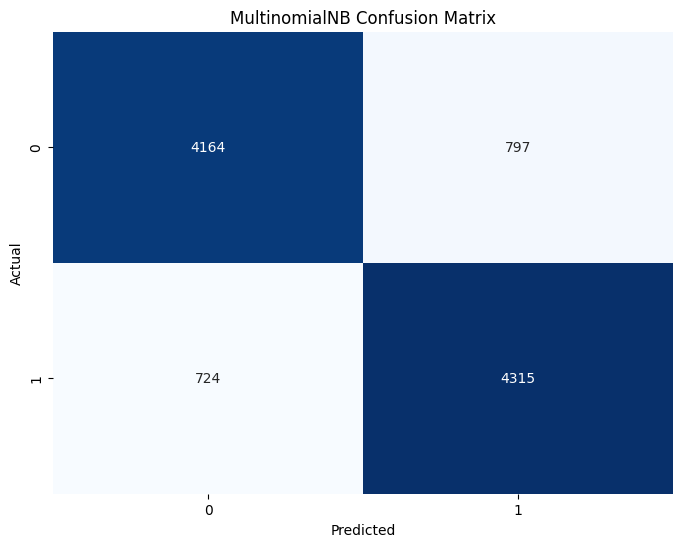

MultinomialNB Accuracy: 0.8479


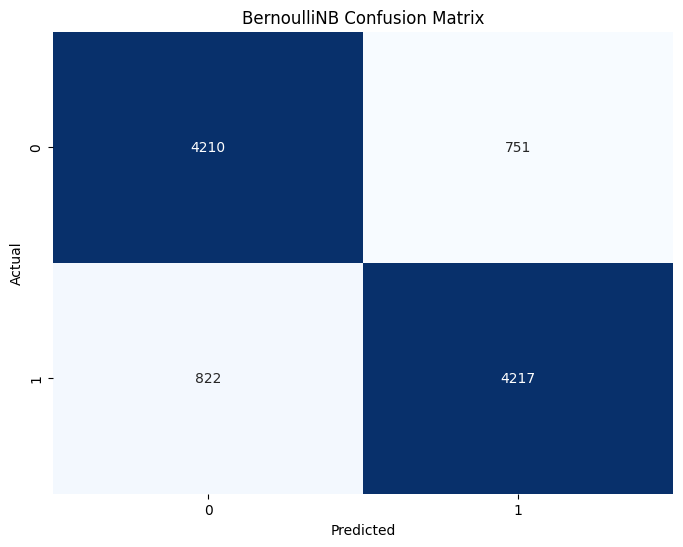

BernoulliNB Accuracy: 0.8427


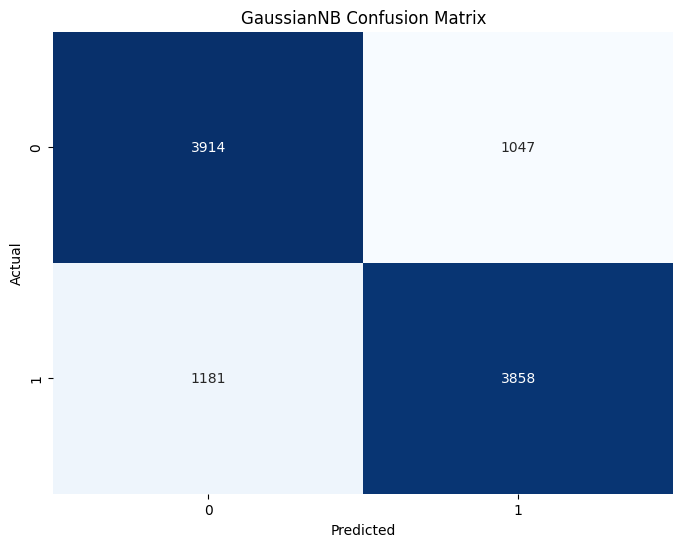

GaussianNB Accuracy: 0.7772


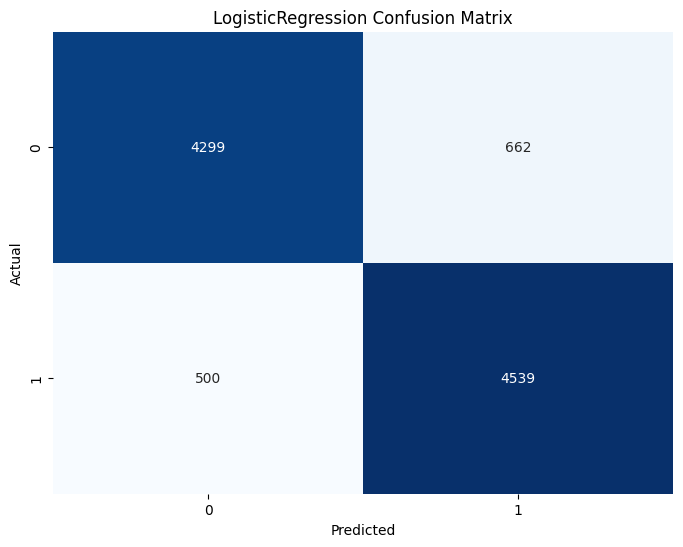

LogisticRegression Accuracy: 0.8838


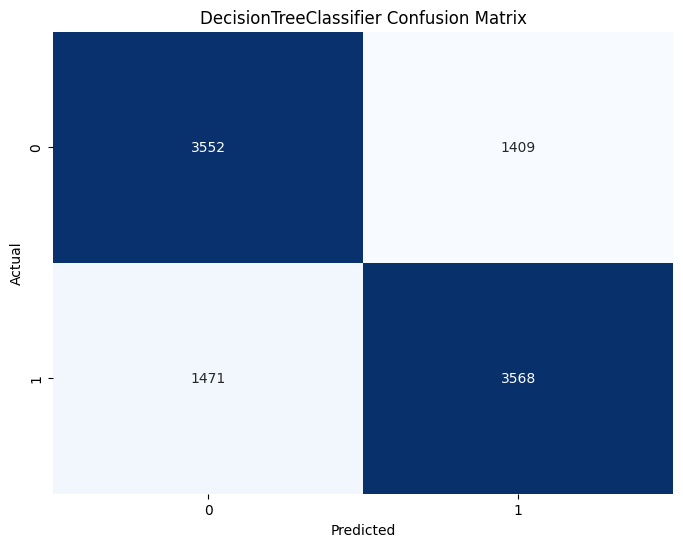

DecisionTreeClassifier Accuracy: 0.712


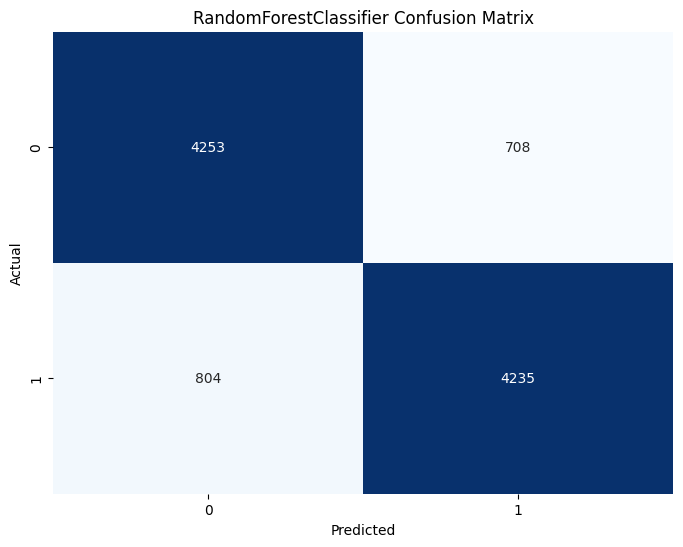

RandomForestClassifier Accuracy: 0.8488


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data into training and testing sets (X1, X2, and Y)
X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(X1, X2, Y, test_size=0.2, random_state=42)

# Create a list of classifiers
classifiers = [
    MultinomialNB(),
    BernoulliNB(),
    GaussianNB(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

# Iterate through each classifier
for classifier in classifiers:
    model_name = classifier.__class__.__name__  # Get the model's name

    # Fit the model to X1
    classifier.fit(X2_train, y_train)
    y_pred = classifier.predict(X2_test)  # Make predictions
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy

    # Create a confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Display the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    print(f"{model_name} Accuracy: {accuracy}")

For CountVectorizer

MultinomialNB Accuracy: 0.8449

BernoulliNB Accuracy: 0.8427

GaussianNB Accuracy = 0.7135

LogisticRegression Accuracy: 0.8695

DecisionTreeClassifier Accuracy: 0.7147

RandomForestClassifier Accuracy: 0.8472

For TFIDF

MultinomialNB Accuracy: 0.8479

BernoulliNB Accuracy: 0.8427

GaussianNB Accuracy = 0.7772

LogisticRegression Accuracy: 0.8838

DecisionTreeClassifier Accuracy: 0.7162

RandomForestClassifier Accuracy: 0.8488
